# Dynamic programming: The pattern of Overlapping Subproblems

# Memoization Recipe

**1) Make it work**

Visualize the problem as tree.

Implement the tree using recursion, i.e Brute-force solution. Think leaves as base. 

Test it, make sure you get the working solution. 

**2) Make it efficent**

Add a memo object. 

Add a base case to return memo values.

Store return values into the memo. 

# Fibonacci

### Brute-force Approach

In [50]:
def fib(n):
    if n<=2:
        return 1
    else:
        return fib(n-2) + fib(n-1)

In [15]:
fib(5)

5

The time complexity of the fib function without memoization is exponential, specifically O(2^n). This is because, in each recursive call, the function makes two additional recursive calls. As a result, the number of function calls grows exponentially with the input n. This results in a significant increase in the time required to calculate larger Fibonacci numbers.

The space complexity of the fib function without memoization is O(n) as it requires space on the call stack for each recursive call. The space complexity is directly proportional to the input n since each call adds a frame to the call stack until the base cases are reached.

### Memoized Version

In [1]:
def fib(n, memo={}):
    if n in memo:
        return memo[n]
    if n<=2:
        return 1
    memo[n] = fib(n-2,memo) + fib(n-1, memo)
    return memo[n]

In [2]:
fib(50)

12586269025

**1) Time Complexity:**

The memoized version of the Fibonacci function significantly improves the time complexity compared to the naive recursive implementation.

With memoization, each Fibonacci number is calculated only once and then stored in the memo dictionary for future reference.

When calculating the Fibonacci number for a given n, the function first checks if the value is already present in the memo dictionary. If it is, the function returns the memoized value in constant time, O(1).

If the value is not in the memo dictionary, the function recursively calculates the Fibonacci number by making two recursive calls with n-2 and n-1. However, for subsequent recursive calls with the same n, the Fibonacci number is retrieved from the memo dictionary, resulting in constant time lookup.

Therefore, the overall time complexity of the memoized Fibonacci function is significantly reduced to O(n), where n represents the input number for which we want to calculate the Fibonacci number.

**2) Space Complexity:**

The space complexity of the memoized version is also improved compared to the naive recursive implementation.

The primary space consumption comes from the memo dictionary, which stores the Fibonacci values as key-value pairs.

In terms of space complexity, the size of the memo dictionary grows proportionally to the input value n. Therefore, the space complexity of the memoized Fibonacci function is O(n).

However, since the memo dictionary is reused across recursive calls and its size is limited to n, the space complexity can be considered as O(1) in practice.

# gridTraveler

Say that you are a traveler on a 2D grid. You begin in the top-left corner and your goal is to travel to the bottom-right corner. You may only move down or right.

In how many ways can you travel to the goal on a grid with dimensions m * n?

Write a function gridTraveler(m, n) that calculates this.

### Brute-force Approach

In [18]:
def gridTraveler(m,n):
    if m==1 and n==1:
        return 1
    if m==0 or n==0:
        return 0
    return gridTraveler(m-1, n) + gridTraveler(m,n-1)

In [19]:
gridTraveler(1,1)

6

In [20]:
gridTraveler(2,3)

3

In [21]:
gridTraveler(3,2)

3

In [22]:
gridTraveler(3,3)

6

**Time compexity: O(2^(n+m))**

**Space complexity: O(n+m)**

### Memoized Version

The function gridTraveler(m, n, memo={}) takes two integers m and n as the dimensions of the grid and an optional dictionary memo that stores previously computed results. 

The memo dictionary is initialized as an empty dictionary.

The function first creates a unique key by concatenating the values of m and n, separated by a comma. This key will be used to store and retrieve the computed results in the memo dictionary.

The function checks if the key exists in the memo dictionary. If it does, it returns the memoized value directly, avoiding redundant calculations.

If m and n both equal 1, it means that the grid size is 1x1, and there is only one possible path (no moves needed). Therefore, the function returns 1.

If either m or n is 0, it means that the grid size is invalid (empty grid), and there are no possible paths. In this case, the function returns 0.

If the memoization step does not apply and the base cases are not met, the function calculates the number of paths recursively. It does this by summing the number of paths from moving down (m-1, n) and the number of paths from moving right (m, n-1).

The computed result for the current grid size is stored in the memo dictionary using the corresponding key.
Finally, the computed result is returned.

In [28]:
def gridTraveler(m,n, memo={}):
    key = (m,n)
    if key in memo:
        return memo[key]
    if m==1 and n==1:
        return 1
    if m==0 or n==0:
        return 0
    memo[key] = gridTraveler(m-1,n, memo) + gridTraveler(m, n-1, memo)
    return memo[key]

In [29]:
gridTraveler(18,18)

2333606220

**1) Time Complexity:**

With memoization, the time complexity of the gridTraveler function is significantly improved compared to the naive recursive implementation.

When computing the number of possible paths for a grid of size m x n, the function first checks if the result for that grid size is already memoized in the memo dictionary. This lookup operation takes constant time, O(1).
If the result is found in the memo dictionary, the function directly returns the memoized value in constant time, O(1).

If the result is not available in the memo dictionary, the function recursively computes the number of paths by making two recursive calls: one for a grid of size (m-1) x n and another for a grid of size m x (n-1).
However, since the results for subproblems are memoized, each unique grid size is computed only once.
Overall, the number of unique grid sizes is limited to m x n, so the recursive computations are done only m x n times.

Therefore, the time complexity of the memoized gridTraveler function is O(m x n).

**2) Space Complexity:**

The space complexity of the memoized version is improved due to the use of memoization.
The primary space consumption comes from the memo dictionary, which stores the computed results for each unique grid size.

In terms of space complexity, the size of the memo dictionary grows proportionally to the number of unique grid sizes, which is m x n at most.

Therefore, the space complexity of the memoized gridTraveler function is O(m x n).

**Time compexity: O(n * m)**

**Space complexity:O(n * m)**

# canSum

Write a function canSum(targetSum, numbers) that takes in a targetSum and an array of numbers as arguments.

The function should return a boolean indicating whether or not it is possible to generate the targetSum using numbers from the array.

You may use an element of the array as many times as needed.

You may assume that all input numbers are nonnegative.

### Brute-force Approach 

The canSum function takes two parameters: targetSum (the desired sum) and numbers (the list of numbers).

The function first checks the base cases:
If targetSum is 0, it means that the desired sum has been achieved using elements from the list. In this case, the function returns True.

If targetSum is negative, it means that the desired sum cannot be achieved using elements from the list. In this case, the function returns False.

If the base cases are not met, the function proceeds with a loop that iterates over each number in the numbers list.

For each number, the function calculates the remainder by subtracting the current number from the targetSum. This represents the remaining sum to achieve after subtracting the current number.

The function then calls itself recursively with the updated targetSum (the remainder) and the same list of numbers. This is done to check if it is possible to obtain the remaining sum using elements from the list.

If the recursive call returns True, it means that a combination of numbers exists that can achieve the remaining sum. In this case, the function immediately returns True.

If the loop completes without finding a valid combination, the function returns False to indicate that it is not possible to obtain the target sum using elements from the list.

**1) Time Complexity:**

The time complexity of the canSum function without memoization is exponential, as it explores all possible combinations of numbers.

For each number in the numbers list, the function calls itself recursively, resulting in multiple recursive calls.

In the worst case, when there are no constraints on the input values, the number of recursive calls grows exponentially with the size of the input.

Therefore, the time complexity of the original implementation without memoization is **O(n^m)**, where n represents the length of the numbers list and m represents the targetSum.

**2) Space Complexity:**

The space complexity of the canSum function is determined by the recursion depth, which depends on the size of the numbers list and the targetSum.

In each recursive call, a new stack frame is created to store the function's variables and parameters.

The maximum depth of the recursion is determined by the value of m, the targetSum.

Therefore, the space complexity of the function without memoization is **O(m)**.

In [33]:
def canSum(targetSum, numbers):
    if targetSum==0:
        return True
    if targetSum<0:
        return False
    for num in numbers:
        remainder = targetSum - num
        if canSum(remainder, numbers):
            return True
    return False  

In [34]:
canSum(7, [5,3,4,7])

True

In [35]:
canSum(7, [2,4])

False

### Memoized Approach 

In [38]:
def canSum(targetSum, numbers, memo={}):
    if targetSum in memo:
        return memo[targetSum]
    if targetSum==0:
        return True
    if targetSum<0:
        return False
    for num in numbers:
        remainder = targetSum - num
        if canSum(remainder, numbers, memo) ==True:
            memo[targetSum] = True
    memo[targetSum] = False
    return False  

In [39]:
canSum(300, [7,14])

False

The canSum function now takes an additional parameter memo, which is an optional dictionary. This dictionary is used to store previously computed results.

At the beginning of the function, it checks if the targetSum exists as a key in the memo dictionary. If it does, the function retrieves the memoized result and returns it directly. This avoids redundant computations and improves efficiency.

The subsequent base cases remain the same as in the original implementation:

If targetSum is 0, it means the desired sum has been achieved using elements from the list. In this case, the function returns True.

If targetSum is negative, it means the desired sum cannot be achieved using elements from the list. The function returns False in this case.

If the base cases are not met, the function enters a loop that iterates over each number in the numbers list.

For each number, the function calculates the remainder by subtracting the current number from the targetSum. This represents the remaining sum to achieve after subtracting the current number.

The function then calls itself recursively with the updated targetSum (the remainder), the same list of numbers, and the memo dictionary. It checks if it is possible to obtain the remaining sum using elements from the list.

If the recursive call returns True, it means a combination of numbers exists that can achieve the remaining sum. In this case, the function memoizes the result by setting memo[targetSum] to True.

If none of the numbers in the loop lead to a valid combination, the function sets memo[targetSum] to False.

Finally, the function returns False to indicate that it is not possible to obtain the target sum using elements from the list.

# howSum

Write a function "howSum(targetSum, numbers) that takes in a targetSum and an array of numbers as arguments.

The function should return an array containing any combination of elements that add up to exactly the targetSum. If there is no combination that adds up to the targetSum, then return null.

If there are multiple combinations possible, you may return any single one.

### Brute-force

In [46]:
def howSum(targetSum, numbers):
    if targetSum==0:
        return []
    if targetSum<0:
        return None  
    
    for num in numbers:
        remainder = targetSum-num 
        remainderResult = howSum(remainder, numbers)
        if remainderResult != None:
            return [*remainderResult, num]
    return None

The howSum function takes two parameters: targetSum (the desired sum) and numbers (the list of numbers).

The function first checks the base cases:
If targetSum is 0, it means the desired sum has been achieved using elements from the list. In this case, the function returns an empty list ([]), indicating that no numbers need to be added.

If targetSum is negative, it means the desired sum cannot be achieved using elements from the list. In this case, the function returns None to indicate failure.

If the base cases are not met, the function enters a loop that iterates over each number in the numbers list.

For each number, the function calculates the remainder by subtracting the current number from the targetSum. This represents the remaining sum to achieve after subtracting the current number.
The function then calls itself recursively with the updated targetSum (the remainder) and the same list of numbers. It checks if it is possible to obtain the remaining sum using elements from the list.

If the recursive call returns a non-null result (indicating a valid combination exists), the function combines the current number with the result of the recursive call using the [*remainderResult, num] syntax. This creates a new list that includes the current number and the previously found combination.

The function then returns this newly formed list as the result. If none of the numbers in the loop lead to a valid combination, the function returns None to indicate failure.

In [47]:
howSum(7,[2,3])

[3, 2, 2]

In [ ]:
howSum(7,[5,3,4,7])

**1) Time Complexity:**

Without memoization, the time complexity of the howSum function is exponential.

In the worst case, the function explores all possible combinations of numbers to find the desired sum.

The number of recursive calls and iterations in the loop depends on the size of the targetSum and the numbers list.

Therefore, the time complexity is **O(n^m * m)**, where n represents the length of the numbers list and m represents the targetSum.

**2) Space Complexity:**

The space complexity of the howSum function without memoization is also exponential.

In each recursive call, a new stack frame is created to store the function's variables and parameters.

Additionally, during each recursive call that returns a valid combination, a new list is created to store the result.

The maximum depth of the recursion is determined by the value of m, the targetSum.

The number of combinations that can be formed is also bounded by the number of recursive calls.

Therefore, the space complexity is **O(m)** for the recursion depth and O(m) for the lists formed during the recursive calls.

### Memoized

In [63]:
def howSum(targetSum, numbers, memo={}):
    if targetSum in memo:
        return memo[targetSum]
    if targetSum==0:
        return []
    if targetSum<0:
        return None  
    
    for num in numbers:
        remainder = targetSum-num 
        remainderResult = howSum(remainder, numbers, memo)
        if remainderResult != None:
            memo[targetSum] = [*remainderResult, num]
            return memo[targetSum]
    memo[targetSum] = None 
    return None

In [64]:
howSum(300,[7,14])

The howSum function now takes an additional parameter memo, which is an optional dictionary. 

This dictionary is used to store previously computed results.

At the beginning of the function, it checks if the current targetSum exists as a key in the memo dictionary using targetSum in memo.

If the targetSum is present in the memo dictionary, it means that the result for that specific targetSum has already been computed and stored. In this case, the function directly retrieves the memoized result from memo[targetSum] and returns it without further computations.

If the targetSum is not found in the memo dictionary, the function proceeds with the rest of the computations and recursive calls.
The subsequent base cases remain the same as in the original implementation:

If targetSum is 0, it means the desired sum has been achieved using elements from the list. In this case, the function returns an empty list ([]), indicating that no numbers need to be added.

If targetSum is negative, it means the desired sum cannot be achieved using elements from the list. The function returns None in this case.

If none of the base cases are met, the function enters a loop that iterates over each number in the numbers list.

For each number, the function calculates the remainder by subtracting the current number from the targetSum. This represents the remaining sum to achieve after subtracting the current number.

The function then calls itself recursively with the updated targetSum (the remainder), the same list of numbers, and the memo dictionary. It checks if it is possible to obtain the remaining sum using elements from the list.

If the recursive call returns a non-null result (indicating a valid combination exists), the function memoizes the result by combining the current number with the result of the recursive call using the [*remainderResult, num] syntax. 
This creates a new list that includes the current number and the previously found combination.

The function then stores this newly formed list in the memo dictionary with targetSum as the key, so that it can be reused in future recursive calls with the same targetSum.

Finally, the function returns the memoized result for the current targetSum.

# bestSum

Write a function 'bestSum(targetSum, numbers)* that takes in a targetSum and an array of numbers as arguments.

The function should return an array containing the shortest combination of numbers that add up to exactly the targetSum.

If there is a tie for the shortest combination, you may return any one of the shortest.

In [70]:
def bestSum(targetSum, numbers):
    shortestCombination = None
    
    if targetSum == 0:
        return []
    if targetSum < 0:
        return None
    
    for num in numbers:
        remainder = targetSum - num
        remainderCombination = bestSum(remainder, numbers)
        if remainderCombination != None:
            combination = [*remainderCombination, num]
            if shortestCombination == None or len(combination) < len(shortestCombination):
                shortestCombination = combination
                           
    return shortestCombination

In [71]:
bestSum(7, [5,3,4,7])

[7]

The shortestCombination variable is defined and set to None at the start of the bestSum function. 

This variable will keep track of the current shortest combination of numbers that adds up to the targetSum.

The base cases remain the same as in the previous version:

If the targetSum is 0, indicating that the desired sum has been achieved, the function returns an empty list ([]).

If the targetSum is negative, meaning that the desired sum cannot be achieved using elements from the list, the function returns None.

The function iterates over each num in the numbers list.

For each num, the function calculates the remainder by subtracting num from the targetSum. 

This represents the remaining sum to achieve after subtracting the current number.

The function makes a recursive call to bestSum with the updated remainder and the same numbers list. This step aims to find the shortest combination of numbers that adds up to the remaining sum.

If the remainderCombination is not None (meaning a valid combination exists for the remainder), the function creates a new combination list by concatenating the remainderCombination with the current num.

The function then compares the length of the combination with the length of the shortestCombination:

If the shortestCombination is None or the length of the combination is smaller, the shortestCombination is updated to the current combination.

The function continues to iterate over the remaining numbers and repeats the process.

Finally, the function returns the shortestCombination as the result.


**1) Time Complexity:** The time complexity is dependent on the number of combinations that can be formed from the given numbers list. In the worst case scenario, where the targetSum is not achievable with any combination, the function will iterate through all the numbers. Therefore, the time complexity can be expressed as O(n^m), where n represents the length of the numbers list and m represents the targetSum.

**2) Space Complexity:** The space complexity is determined by the depth of the recursion stack. In the worst case, the recursion depth can reach m, which corresponds to the size of the targetSum. Therefore, the space complexity is O(m).

In the worst case scenario, where no combination of numbers adds up to the targetSum, the function will have to explore all possible combinations.

For each element in the numbers list, the function makes a recursive call to bestSum with an updated targetSum (subtracting the current number). This recursive call is repeated for each element in the list, resulting in n recursive branches at each level of the recursion.

The depth of the recursion depends on the targetSum. In the worst case, the targetSum is equal to the smallest number in the numbers list, and each recursive call subtracts one from the targetSum. Therefore, the recursion depth is m.

As the function explores all possible combinations by traversing each branch of the recursive calls, the total number of recursive calls made can be expressed as n * n * n * ... (m times), which is equivalent to n^m.

In summary, the time complexity of O(n^m) indicates that the function's execution time grows exponentially with the size of the targetSum and the numbers list. As the size of the problem increases, the number of recursive calls and computations required increases exponentially. This exponential growth is the characteristic of an algorithm with an O(n^m) time complexity.

In [73]:
def bestSum(targetSum, numbers):
    shortestCombination = None
    # Initialize the variable to track the shortest combination

    if targetSum == 0:
        return []
    # If the targetSum is 0, return an empty list since the sum has been achieved

    if targetSum < 0:
        return None
    # If the targetSum is negative, return None as it cannot be achieved

    for num in numbers:
        remainder = targetSum - num
        # Calculate the remaining sum to achieve after subtracting the current number

        remainderCombination = bestSum(remainder, numbers)
        # Make a recursive call to find the combination for the remaining sum

        if remainderCombination != None:
            combination = [*remainderCombination, num]
            # If a valid combination exists for the remainder, create a new combination
            # by concatenating the remainderCombination and the current number

            if shortestCombination == None or len(combination) < len(shortestCombination):
                shortestCombination = combination
                # If the current combination is shorter than the previously stored shortest combination,
                # update the shortestCombination variable

    return shortestCombination
    # Return the shortest combination found

### Memoization

In [78]:
def bestSum(targetSum, numbers, memo={}):
    if targetSum in memo:
        return memo[targetSum]
    if targetSum == 0:
        return []
    if targetSum < 0:
        return None 
    
    shortestCombination = None
    
    for num in numbers:
        remainder = targetSum - num
        remainderCombination = bestSum(remainder, numbers, memo)
        
        if remainderCombination != None:
            combination = [*remainderCombination, num]      
            if shortestCombination is None or len(combination)<len(shortestCombination):
                shortestCombination = combination 
                    
    memo[targetSum] = shortestCombination
    return shortestCombination

In [79]:
bestSum(100,[1,2,5,25])

[25, 25, 25, 25]

In [ ]:
def bestSum(targetSum, numbers, memo={}):
    if targetSum in memo:
        return memo[targetSum]
    if targetSum==0:
        return []
    if targetSum<0:
        return None
    
    shortestCombination = None 
    
    for num in numbers:
        remainder = target-num
        remainderCombination = bestSum(remainder, numbers, memo)
                
        if remainderCombination != None: 
            combination = [*remainderCombination, num]  
            
            if shortestCombination == None or len(combination) < len(shortestCombination):
                shortestCombination = combination 
    memo[targetSum] = shortestCombination             
    return shortestCombination 

The function takes three arguments: targetSum (the number you want to reach), numbers (the list of numbers you can use), and memo (a dictionary to store previously calculated results for efficiency).

It first checks if the targetSum is already in memo. If it is, it returns the value stored in memo for targetSum because we've already calculated the shortest combination for this sum before.

Then, it checks if the targetSum is 0 or negative. If targetSum is 0, it means we have found a valid combination, so it returns an empty list. If targetSum is less than 0, it means the combination isn't possible, so it returns None.

The function initiates shortestCombination as None. This variable will hold the shortest valid combination we find.
It goes through each number in numbers. For each num, it subtracts num from targetSum, giving us remainder.

Then, it recursively calls bestSum with remainder, numbers, and memo. This means it's trying to find the shortest combination for the remainder. The result is stored in remainderCombination.

If remainderCombination is not None (meaning a valid combination for remainder was found), it creates a new list combination which contains num and all elements in remainderCombination.

It then checks if shortestCombination is None or if combination is shorter than shortestCombination. If so, it sets shortestCombination to combination.

After the loop finishes, the function stores shortestCombination in memo with targetSum as the key. This is so if we encounter the same targetSum again, we can just return the stored result instead of re-calculating it.

Finally, it returns shortestCombination, which is the shortest combination of numbers that adds up to targetSum.

The bestSum function's performance depends on two variables:

m : the target sum

n : the length of the array of numbers

**1) Time Complexity:**

Without memoization, the time complexity of the function would be O(n^m) because in the worst case, we have to iterate through each number for every recursive call, which can branch up to m times.

With memoization, the time complexity is significantly reduced to O(n*m^2). Here's why:

There are m levels of recursion in the call stack, from m down to 0. So we make m calls overall.

For each call, we might have to iterate through all n numbers in the worst case.

For each of these combinations, we are creating a new array, which in the worst case can have m elements (when each number in the combination is 1). So, creating a new array (i.e., [*remainderCombination, num]) could take up to O(m) time.

Hence, the time complexity is O(n*m^2).

**2) Space Complexity:**

The space complexity of the function is O(m^2), primarily due to two factors:

The depth of the recursion tree, i.e., the maximum height of the call stack, is m in the worst case. This is because the target sum reduces down to 0, decrementing at most by 1 at each step.

For each recursive call, a new combination array is created and can have m elements in the worst case. This array is stored in the memo dictionary.

So, in the worst case, if all possible sums up to m have m length combinations stored in the memo dictionary, the space complexity becomes O(m^2).

**Non-Memoized Version:**

In the non-memoized version, every function call branches out into further function calls, for each number in the array. Without memoization, we re-compute the same sub-problems multiple times. For instance, if targetSum is 10 and numbers is [1, 2, 5], we would calculate bestSum(9, [1, 2, 5]), bestSum(8, [1, 2, 5]), etc., separately for each branch, even though the results are the same. This gives us a time complexity of O(n^m), where n is the number of elements in the array and m is the target sum.

**Memoized Version:**

In the memoized version, we store the results of function calls in a memo dictionary, which eliminates the need for re-computation. Once we've calculated bestSum(9, [1, 2, 5]) in one branch, we don't need to calculate it again in another branch; we simply retrieve the result from the memo.

With memoization, we're not re-computing any sub-problem more than once. For every unique sum from m down to 0 (i.e., m different sums), we're running through the entire list of n numbers and creating a new combination which can take m time in worst case (this is where the m^2 in time complexity comes from). Hence, with memoization, the time complexity is significantly reduced to O(m^2 * n).

# canConstruct

Write a function canconstruct(target, wordBank) that accepts a target string and an array of strings.

The function should return a boolean indicating whether or not the
'target* can be constructed by concatenating elements of the
'wordBank* array.

You may reuse elements of "wordBank* as many times as needed.

### Brute-force approach

In [94]:
def canConstruct(target, wordBank):
    if target == "":
        return True

    for word in wordBank:
        if target.startswith(word):
            suffix = target[len(word):]
            if canConstruct(suffix, wordBank):
                return True
    return False

print(canConstruct('skateboard', ['bo', 'rd', 'ate', 't', 'ska', 'sk', 'boar']))

False


### Memoization

In [95]:
def canConstrcut(target, wordBank, memo={}):
    if target in memo:
        return memo[target]
    if target=="":
        return True
    
    for word in wordBank:
        if target.startswith(word):
            suffix = target[len(word):]
            if canConstruct(suffix, wordBank, memo):
                memo[target] = True 
                return True
    memo[target] = False
    return False 

The brute force solution of the problem is implemented, which aims to determine if a target string (e.g., "enterapot") can be constructed from a word bank (e.g., ['e', 'enter', 'a', 'pot']).

Before optimizing this solution, the time complexity of the current solution is understood. The time complexity is a measure of the amount of computer time taken by an algorithm to run.

To visualize the time complexity, a call tree is created. This call tree branches out into multiple nodes based on the number of words in the word bank that can be a prefix to the target string. For example, for the target string "enter", words like "e" and "enter" are valid prefixes.

The height of the call tree is defined as m (the length of the target string, such as "enterapot" has a length of 10), and the number of words in the word bank is n (for a word bank of ['e', 'enter', 'a', 'pot'], n would be 4).

The worst-case scenario would require us to take a single character out of the target string multiple times which makes the tree very tall. For instance, constructing "enterapot" using only the single character 'e' from the word bank.

The overall time complexity is considered to be the branching factor (n) to the power of height (m), which turns out to be O(n^m). If we had a target of length 10 (m=10) and 4 words in the word bank (n=4), then the worst-case time complexity would be O(4^10).

In addition to this, the slicing operation in the code contributes to the complexity and is accounted for, making the time complexity O(m*n^m). Slicing is when we take a subset of the target string, such as taking "enter" out of "enterapot".

For space complexity, due to the call stack, it's going to be the height of the tree (O(m)). However, considering that in each call a new string of length m is created and stored, the space complexity is O(m^2) - quadratic space complexity. This means the amount of memory used increases quadratically with the length of the target string.

To optimize this, a technique called memorization is used. This technique stores the results of expensive function calls and reuses them when the same inputs occur again, reducing the number of calls.

With memorization, the time complexity is improved from exponential to O(n*m^2), because duplicate subtrees are not fully explored. Instead, results are stored and fetched from the memo, reducing the amount of computation required.

The space complexity, despite the addition of the memo, remains in the polynomial class. This is preferable because it means the amount of memory used is still proportional to the square of the length of the target string, rather than increasing exponentially.

# countConstruct

Write a function countConstruct(target, wordBank) that accepts a target string and an array of strings.
The function should return the number of ways that the 'target can be constructed by concatenating elements of the 'wordBank* array.

### Brute-force

In [104]:
def countConstruct(target, wordBank):
    if target == "":
        return 1
    
    totalCount = 0
    
    for word in wordBank:
        if target.startswith(word):
            suffix = target[len(word):]
            numwaysRest = countConstruct(suffix, wordBank)
            totalCount+=numwaysRest
            
    return totalCount

In [105]:
countConstruct('purple', ['purp', 'p', 'ur', 'le', 'purpl'])

2

### Memoization

In [106]:
def countConstruct(target, wordBank, memo={}):
    if target in memo:
        return memo[target]
    if target == "":
        return 1
    
    totalCount = 0
    
    for word in wordBank:
        if target.startswith(word):
            suffix = target[len(word):]
            numWaysForRest = countConstruct(suffix, wordBank, memo)
            totalCount+=numWaysForRest
            
    memo[target] = totalCount
    return totalCount

In [108]:
countConstruct('eeeeeeeeeeeeeeeeeef', ['e', 'eee', 'eeeee', 'eeeeeeee'])

0

# allConstruct

Write a function "allConstruct(target, wordBank) that accepts a target string and an array of strings.

The function should return a 2D array containing all of the ways that the 'target can be constructed by concatenating elements of the wordBank array. Each element of the 2D array should represent one combination that constructs the 'target

You may reuse elements of 'wordBank* as many times as needed.

### Brute-force

The task is to write a function named "all construct" which takes a target string and a word bank (an array of words).

This function should return all possible ways to construct the target string by concatenating elements from the word bank.

The return value should be a two-dimensional array, where each sub-array represents one way to construct the target string.

Elements from the word bank can be reused as many times as needed.

The task also requires examining some examples to understand the problem better.

For instance, with a target of "purple" and a word bank containing words that can form "purple", the function should return all combinations that can form "purple".

In case where the target string cannot be constructed using words from the word bank, the function should return an empty array.

When the target string is an empty string, the function should return an array containing an empty array. This signifies that there's one way to create the empty string: taking no elements from the word bank.

To build the solution, one could use a tree structure to visualize how words from the bank can be combined to form the target string. This process is done recursively.

In this structure, each node represents a remaining portion of the target string, and each edge represents a word from the word bank.

When a combination forms the target string, the combination (as a sub-array) is returned to the parent node.

The parent node then concatenates all the returned sub-arrays into one 2D array and returns it further up the tree.

This process is repeated until the original function call is reached, which then returns the final 2D array of all possible combinations.

In [109]:
def allConstruct(target, wordBank):
    if target == "":
        return [[]]

    result = []

    for word in wordBank:
        if target.startswith(word):
            suffix = target[len(word):]
            suffixWays = allConstruct(suffix, wordBank)
            targetWays = [[word] + way for way in suffixWays]
            result.extend(targetWays)
    
    return result          

In [110]:
allConstruct('purple', ['purp', 'p', 'ur', 'le', 'purpl'])

[['purp', 'le'], ['p', 'ur', 'p', 'le']]

In this code, we first check if the target is an empty string. If it is, we return a list containing an empty list because there is one way to construct an empty string, which is to use no words at all.

Next, we create an empty list result to hold all possible ways to construct the target.

We then iterate over each word in wordBank. If a word is a prefix of the target, we get the suffix of target by slicing it from the length of the word to the end. We then recursively call allConstruct on the suffix and wordBank, storing the result in suffixWays.

After that, we use a list comprehension to prepend the current word to each way in suffixWays, creating targetWays. We then extend result by targetWays.

Finally, we return result, which contains all possible ways to construct the target from the words in wordBank.

**Time Complexity:**

The time complexity is O(n^m), where n is the length of the wordBank and m is the length of the target string. Here's why:

In the worst-case scenario, for each character in the target string, we are checking all words in the wordBank. The function recurses by the length of the target string and for each recursion, it iterates over all words in the wordBank. Hence, the worst-case time complexity is exponential, O(n^m).

**Space Complexity:**

The space complexity of this function is also O(n^m), as in the worst case, there could be an exponential number of combinations to construct the target string, and each of those combinations requires its own space in memory.

Additionally, we should account for the space used by the recursion stack. The maximum depth of the recursion is equal to the length of the target string. Each recursive call uses some memory to keep track of local variables, return address, etc. Thus, the total space used by the recursion stack could be proportional to the size of the target string.

In [111]:
def allConstruct(target, wordBank, memo=None):
    if memo is None:
        memo = {}
    if target in memo:
        return memo[target]
    if target == "":
        return [[]]

    totalWays = []
    
    for word in wordBank:
        if target.startswith(word):
            suffix = target[len(word):]
            suffixWays = allConstruct(suffix, wordBank, memo)
            targetWays = [[word] + way for way in suffixWays]
            totalWays.extend(targetWays)

    memo[target] = totalWays
    return totalWays

The function allConstruct(target, wordBank, memo) accepts a target string and an array of strings (wordBank) and an optional dictionary (memo).

The memo is initialized as an empty dictionary if it is not provided.

The function first checks if the target is in the memo. If it is, it returns the memoized value. This is the key to avoiding redundant computation.

If the target is an empty string, it returns a list containing an empty list, because there is one way to construct an empty string, that is with no words.

For each word in the wordBank, it checks if the target starts with that word. If it does, it removes the prefix from the target to get the suffix and recursively tries to construct the suffix using words in the wordBank.

It adds the current word to the start of each way to construct the suffix, and these ways are added to the totalWays for the current target.

It memoizes the totalWays for the current target before returning it. This allows us to avoid recomputation if the same target comes up in the future.

**Time Complexity:**

The time complexity is now O(n*m^2), where n is the size of the wordBank and m is the length of the target string.

This is because with memoization, each subproblem (each unique substring of the target) is solved only once. For each subproblem, we iterate over each word in the wordBank (O(n)) and potentially create a new string (O(m)). So, in the worst-case, the time complexity is O(n*m^2).

**Space Complexity:**

The space complexity is O(m^2), which is due to storing all the substrings of the target string in the memo. The maximum depth of the recursion is also proportional to m, and hence we also account for the space used by the recursion stack.

Each key in the memo is a substring of the target string, and the space used to store each key is proportional to the size of the substring. Since we store all possible substrings of the target string in the memo, the total space used by the keys is proportional to the square of the size of the target string, hence O(m^2). 

We are also storing all the possible ways to construct the target string in the memo, but in this case, it is not straightforward to express the size of these values in terms of m and n, because it depends on how many ways there are to construct the target string from the words in the wordBank. In the worst case, if every word in the wordBank is a single character, and the target string is of length m, then there could be m! (m factorial) ways to construct the target string, because each position in the string could be constructed from any of the m words in the wordBank.

However, this is an extreme case that assumes that every possible rearrangement of the words is valid, which is unlikely to be true in most real-world scenarios. In most cases, the number of ways to construct the target string would be much less than m!, so the space used to store these values in the memo would be significantly less than m!.

Therefore, while it's important to be aware that the space used by the memo could potentially be large, in practice, it's likely to be much less than m^2 for most inputs, and the space complexity of the function is dominated by the O(m^2) term from the keys in the memo and the recursion stack.

However, the important point to note here is that while memoization can significantly improve the time complexity of this function, it can potentially increase the space complexity, especially for inputs that have a large number of valid rearrangements. This is a trade-off that you should be aware of when deciding whether or not to use memoization.

# Tabulation

Dynamic programming (DP) is a strategy for solving optimization problems by breaking them down into simpler subproblems and reusing solutions to these subproblems to build up solutions to larger ones. There are two common approaches to implementing dynamic programming solutions: top-down (often called "memoization") and bottom-up (often called "tabulation").

Tabulation is the bottom-up approach where we solve all related subproblems first, based on the dependencies, then use their results to solve larger subproblems until we solve the original problem.

# Tabulation Recipe 

**1) Identify the Problem Structure:** Understand the problem and how it can be broken down into subproblems. If it's a problem related to sequences, such as Fibonacci, a one-dimensional table might be enough. For problems involving a grid, like the grid traveler problem, a two-dimensional table would be more appropriate.

**2) Create the Table:** Based on the size of the input, initialize a table that would accommodate all the subproblems. Be careful of off-by-one scenarios when deciding the size.

**3) Initialize the Table:** Fill the table with appropriate default values, which will often be determined by the problem's requirements. If the problem asks for a numeric result, initialize the table with numbers. If the problem is about boolean values, initialize with true/false.

**4) Set Base Case(s):** Identify and set the base case(s) in the table. These are situations where the solution is trivially known and they act as the "seed" from which the rest of the table will be filled. For instance, in the Fibonacci sequence, the base cases are the first two numbers which are typically set to 0 and 1.

**5) Fill the Table:** Iterate over the table and fill in the rest of the values based on the relationship between the current problem and its subproblems. This will require understanding the problem-specific rules and patterns, such as looking at the immediate previous two numbers for the Fibonacci sequence or checking the cell to the left and the cell above for the grid traveler problem.

**6) Extract the Solution:** The solution to the original problem should be located in the final cell(s) of the table, assuming you've filled the table correctly. Extract and return this value.

# Fibonacci

In [6]:
def fibonacci(n):
    fib = [0,1] + [0] * (n-1)
    for i in range(2, n+1):
        fib[i] = fib[i-1] + fib[i-2]
    return fib[n]

In [7]:
fibonacci(6)

8

In [8]:
fibonacci(7)

13

# Grid Traveler

This Python function uses a 2D list to store the solutions to subproblems. The cell at table[i][j] stores the number of ways to reach the cell in the i-th row and j-th column of the grid. To fill in this table, we iterate over all cells and, for each cell, we "spread" its value to the cells directly to the right and down. The final solution is in the bottom right cell of the table.

In [23]:
def gridTravelerTabulation(m, n):
    # Initialize the table with zeros.
    # Table has (m + 1) * (n + 1) cells, to account for 0 rows/columns.
    table = [[0] * (n + 1) for _ in range(m + 1)]

    # Base case: There is exactly one way to travel a 1x1 grid.
    table[1][1] = 1

    # Iterate through all cells in the table.
    for i in range(m + 1):
        for j in range(n + 1):
            # Check if we can go right.
            if j + 1 <= n:
                table[i][j + 1] += table[i][j]
            # Check if we can go down.
            if i + 1 <= m:
                table[i + 1][j] += table[i][j]

    # Return the solution in the bottom right cell.
    return table[m][n]

In [24]:
gridTravelerTabulation(3,3)

6

# canSumTabulation

This Python function creates an array called table of boolean values. The index in the table represents the current target sum. If table[i] is True, it means we can generate a sum of i using the given numbers.

The table is initialized with False values except for the 0th index, which is True because we can always generate a sum of 0 with no numbers.

Then, we iterate over the table, and for each True value, we add all numbers from the array to the current index and mark the resulting indices as True.

Finally, we return the value at the index target_sum in the table. If it's True, we can generate the target sum with the given numbers. If it's False, we can't.

For example, if you call canSum(7, [2, 3]), the function will return True, which means it's possible to generate a sum of 7 using the numbers 2 and 3.

In [27]:
def canSumTabulation(target_sum, numbers):
    table = [False] * (target_sum + 1)
    table[0] = True

    for i in range(target_sum + 1):
        if table[i]:
            for num in numbers:
                if i + num <= target_sum:
                    table[i + num] = True

    return table[target_sum]

In [28]:
canSumTabulation(7,[2,3])

True

**1) Time Complexity:** The time complexity of this function is **O(m*n)**, where m is the target sum and n is the length of the numbers array.
This is because, for each value from 0 to m (hence the m part of the complexity), we potentially loop over all n numbers in the numbers array to fill the table (hence the n part of the complexity). Therefore, in the worst-case scenario, the function has a time complexity proportional to m*n.

**2) Space Complexity:** The space complexity of the function is **O(m)**.
This is because we maintain a table of size m+1 to keep track of whether it is possible to generate each sum up to m. The size of this table is determined only by the size of the target sum, not by the number of elements in the numbers array. Hence, the space complexity is proportional to m.

This solution is much more efficient than the brute force approach, which would have an exponential time complexity due to the number of ways the target sum can be generated. Tabulation allows us to avoid redundant calculations by reusing previously computed results, thus resulting in a more efficient algorithm.

# howSumTabulation

This Python function creates a list called table where each entry at index i holds one combination of numbers that adds up to i, or None if there is no such combination.

The table is initialized with None values except for the 0th index, which is an empty list because there is one way to create the sum of 0 - using no numbers.

Then, we iterate over the table, and for each non-None value, we add all numbers from the array to the current index and store the combination in the resulting indices.

Finally, we return the value at the index target_sum in the table. If it's not None, it represents a combination of numbers that adds up to the target sum. If it's None, there is no such combination.

For example, if you call howSum(7, [2, 3]), the function may return [3, 2, 2], which means you can create a sum of 7 by using the numbers 3, 2, and 2. Note that the problem does not require a unique solution - any valid solution is acceptable.

In [29]:
def howSumTabulation(target_sum, numbers):
    table = [None] * (target_sum + 1)
    table[0] = []

    for i in range(target_sum + 1):
        if table[i] is not None:
            for num in numbers:
                if i + num <= target_sum:
                    table[i + num] = table[i] + [num]

    return table[target_sum]

In [30]:
howSumTabulation(7,[2,3])

[3, 2, 2]

**1) Time Complexity:** The time complexity of the howSum function is O(m^2*n), where m is the target sum and n is the length of the numbers array.

We iterate over all the numbers from 0 to m (hence the m part of the complexity).
For each number, we loop over all n elements in the numbers array (hence the n part of the complexity).
Furthermore, when a valid combination is found, we create a new list. The creation of this new list takes O(m) time as it can have at most m elements. So, the total time complexity becomes O(m^2*n).

**2) Space Complexity:** The space complexity of the function is a bit more complicated. At first glance, it appears to be O(m) because we maintain a table of size m+1. However, in this case, we also need to account for the space taken up by the combinations of numbers we store in the table.
Each of these combinations could potentially be as large as the target sum in the case where we can use 1 to make up the target sum. Therefore, in the worst-case scenario, the space complexity of the function can be considered O(m^2).

# bestSumTabulation

This Python function creates a list called table where each entry at index i holds the shortest combination of numbers that adds up to i, or None if there is no such combination.

The table is initialized with None values except for the 0th index, which is an empty list because there is one way to create the sum of 0 - using no numbers.

We then iterate over the table, and for each non-None value, we add all numbers from the array to the current index and store the combination in the resulting indices, but only if this combination is shorter than what is already stored at that index.

Finally, we return the value at the index target_sum in the table. If it's not None, it represents the shortest combination of numbers that adds up to the target sum. If it's None, there is no such combination.

For example, if you call bestSum(7, [5, 3, 4, 7]), the function will return [7], which means you can create a sum of 7 by using the number 7, and this is the shortest possible combination.

In [38]:
def bestSumTabulation(target_sum, numbers):
    table = [None] * (target_sum + 1)
    table[0] = []

    for i in range(target_sum + 1):
        if table[i] is not None:
            for num in numbers:
                if i + num <= target_sum:
                    combination = table[i] + [num]
                    # If this combination is shorter than what's already stored
                    if table[i + num] is None or len(combination) < len(table[i + num]):
                        table[i + num] = combination

    return table[target_sum]

In [39]:
bestSumTabulation(8,[2,3,5])

[3, 5]

**1) Time Complexity:**  The time complexity of this function is O(m^2*n), where m is the target sum and n is the length of the numbers array.
The reason for this is because for each value from 0 to m, we iterate over all n numbers in the numbers array (which gives us the O(mn) part). Additionally, we also create a new list when we find a better combination, and in the worst-case scenario, this list could have m elements. Thus, creating this new list takes O(m) time, leading to the O(m^2n) time complexity.

**2) Space Complexity:** The space complexity of the function is O(m^2).
We maintain a table of size m+1 to keep track of the best combinations. Each entry in the table can potentially store a list of size m (in the worst-case scenario where the shortest combination still consists of m numbers). Therefore, in the worst-case scenario, the space complexity of the function can be considered O(m^2).

# canConstruct Tabulation

This Python function creates a list called table where each entry at index i is a boolean indicating whether we can construct the substring of target up to index i from the words in word_bank.

The table is initialized with False values, except for the 0th index which is True because we can construct the empty string with no words.

We then iterate over the table, and for each True value, we iterate over the word bank and check if the word from the word bank matches the characters in the target string starting at the current index. If there is a match, we set the table entry at the index that is the current index plus the length of the word to True.

Finally, we return the last value in the table, which indicates whether we can construct the entire target string from the words in word_bank.

For example, if you call canConstructTabulation('abcdef', ['ab', 'abc', 'cd', 'def', 'abcd']), the function will return True, which means you can construct the string 'abcdef' from the given word bank.

In [40]:
def canConstructTabulation(target, word_bank):
    table = [False] * (len(target) + 1)
    table[0] = True

    for i in range(len(target) + 1):
        if table[i]:
            for word in word_bank:
                # If the word matches the characters starting at position i
                if target[i:i+len(word)] == word:
                    new_index = i + len(word)
                    if new_index <= len(target):
                        table[new_index] = True

    return table[len(target)]

In [41]:
canConstructTabulation('abcdef', ['ab', 'abc', 'cd', 'def', 'abcd'])

True

**1) Time Complexity: O(m^2*n)**  We iterate over all the characters from 0 to m (hence the m part of the complexity), where m is the length of the target string.
For each character, we loop over all n words in the word bank (hence the n part of the complexity).
The slicing operation target[i:i+len(word)] can take up to O(m) time because in the worst case it could involve copying the entire target string.
Therefore, the total time complexity is O(m^2*n).

**2) Space Complexity: O(m)** We maintain a table of size m+1 to track whether we can construct the substring of the target up to index i from the words in the word bank.
Each entry in the table is a boolean value, so the space complexity is proportional to the length of the target string.

# countConstruct Tabulation

This Python function creates a table where each entry at index i is the number of ways we can construct the substring of target up to index i from the words in word_bank.

The table is initialized with 0's, except for the 0th index which is 1 because there is one way to construct the empty string (with no words).

We then iterate over the table, and for each entry, we iterate over the word bank and check if the word from the word bank matches the characters in the target string starting at the current index. If there is a match, we add the current number of ways to construct the substring to the number of ways to construct the substring that extends to the end of the current word.

Finally, we return the last value in the table, which is the number of ways we can construct the entire target string from the words in word_bank.

For example, if you call countConstructTabulation('purple', ['purp', 'p', 'ur', 'le', 'purpl']), the function will return 2, which is the number of ways to construct the string 'purple' from the given word bank.

In [46]:
def countConstructTabulation(target, word_bank):
    table = [0] * (len(target) + 1)
    table[0] = 1  # base case: one way to construct the empty string

    for i in range(len(target) + 1):
        for word in word_bank:
            # If the word matches the characters starting at position i
            if target[i:i+len(word)] == word:
                if i + len(word) <= len(target):
                    table[i+len(word)] += table[i]

    return table[len(target)]

In [47]:
countConstructTabulation('purple', ['purp', 'p', 'ur', 'le', 'purpl'])

2

**1) Time Complexity: O(n*m^2)**

n is the length of the word bank and m is the length of the target string.
The main loop goes through m elements, and for each of them, it goes through n words in the word bank.
Additionally, we need to create new combinations of words, which can be up to m long, hence the additional m in the time complexity.

**2) Space Complexity: O(m)**

We need to store a table of size m+1. This is required to hold all sub-problems results, where m is the length of the target string. Each entry in the table is a single integer, which is the count of ways to construct the corresponding substring, so the space complexity is directly proportional to m.


# allConstruct Tabulation

This Python function creates a list called table where each entry at index i is a list of all ways we can construct the substring of target up to index i from the words in word_bank.

We initialize the table with empty lists, except for the 0th index which contains a list with one empty list inside it, representing the one way to construct the empty string (with no words).

We then iterate over the table, and for each entry, we iterate over the word bank and check if the word from the word bank matches the characters in the target string starting at the current index. If there is a match, we generate new combinations by adding the current word to each combination that constructs the current substring, and add these new combinations to the combinations for the substring that extends to the end of the current word.

Finally, we return the last value in the table, which is a list of all ways we can construct the entire target string from the words in word_bank.

For example, if you call allConstructTabulation('purple', ['purp', 'p', 'ur', 'le', 'purpl']), the function will return [['purp', 'le'], ['p', 'ur', 'p', 'le']], which are the two ways to construct the string 'purple' from the given word bank.

In [44]:
def allConstructTabulation(target, word_bank):
    table = [[] for _ in range(len(target) + 1)]
    table[0] = [[]] # base case: one way to construct the empty string

    for i in range(len(target) + 1):
        for word in word_bank:
            # If the word matches the characters starting at position i
            if target[i:i+len(word)] == word:
                new_combinations = [combination + [word] for combination in table[i]]
                if i + len(word) <= len(target):
                    table[i+len(word)].extend(new_combinations)

    return table[len(target)]

In [45]:
allConstructTabulation('purple', ['purp', 'p', 'ur', 'le', 'purpl'])

[['purp', 'le'], ['p', 'ur', 'p', 'le']]

**1) Time Complexity: O(n*m^2)**

n is the length of the word bank and m is the length of the target string.
The main loop goes through m elements, for each of them it goes through n words in the word bank.
Additionally, we need to create new combinations of words. In the worst case, this involves copying all combinations formed up to the current string length, hence the additional m in the time complexity.

**2) Space Complexity: O(n*m^2)**

We need to store a table of size m, where each element in the table can have multiple combinations of words from the word bank. In the worst case, every combination of words will be stored in the table.
Each of these combinations of words is a list that, in the worst case, contains m words (when each word is of length 1). Therefore, the space complexity is proportional to the square of the length of the target string times the length of the word bank.

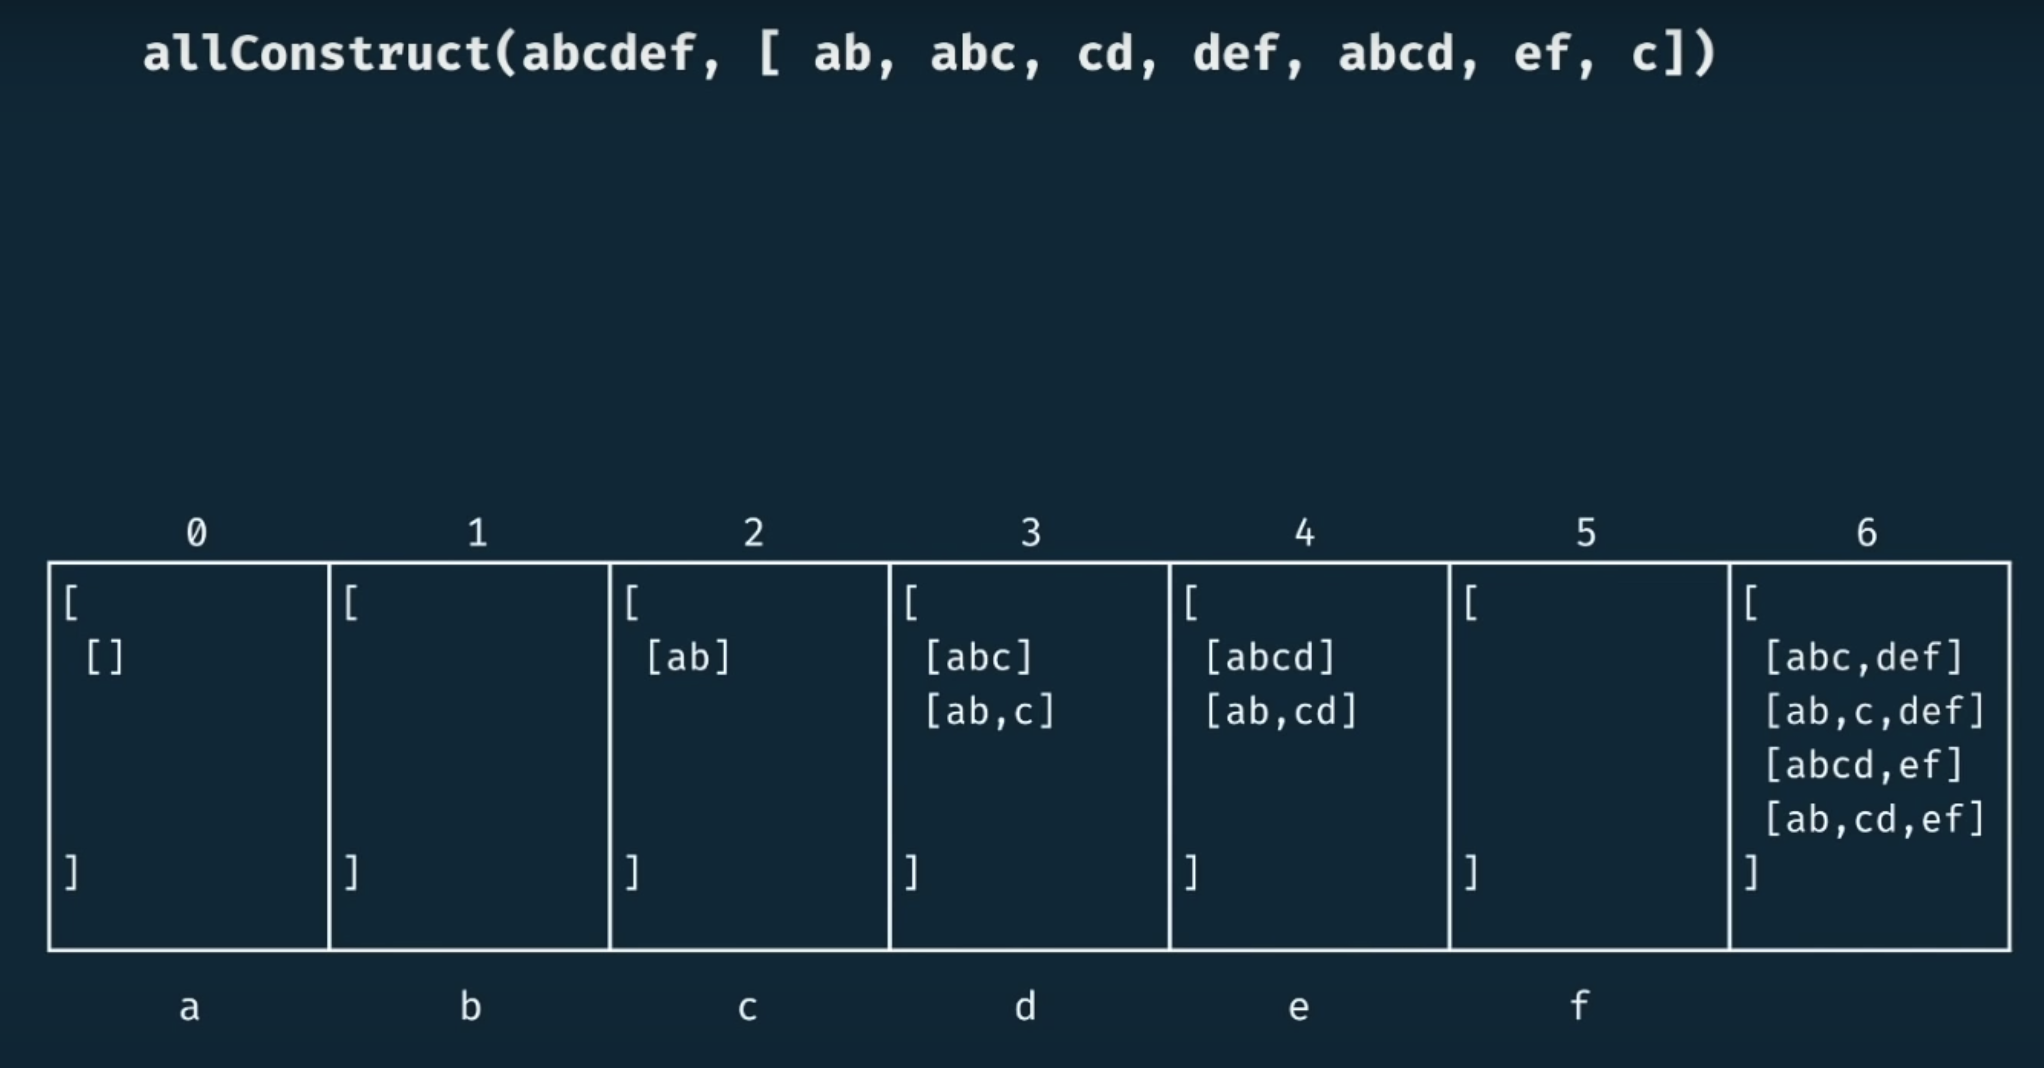

In [49]:
allConstructTabulation("abcdef", ["ab", "abc", "cd", "def", "abcd", "ef", "c"])

[['abc', 'def'], ['ab', 'c', 'def'], ['abcd', 'ef'], ['ab', 'cd', 'ef']]